Zihao Mao

Cameron Matson

9/22/2017

# Lab 3: Images

## Introduction

For this lab we examine the images of the Stanford Dog Dataset.  The dataset consits of ~20,000 images of dogs from 120 different breeds.

#### Issues
The dataset is primarily used for fine-grained classification problems, meaning that the instances are all members of the same main class and are divided by subclass.  In this case, the main class is 'Dog' and the subclass is the breed: 'Beagle', 'Poodle', 'Lab'...  These are potentially more difficult than standard classification problems because in theory all members of teh main class should at least share similar features.  In other words as the saying goes "a dog is a dog is a dog not a cat."

Another challenge with this dataset is that there is that they do not depict a standard scene.  These are not faces of dogs.  These are not photoshoot photos of dogs.  The images in the dataset are not even exclusively of dogs.  Some contain multiple dogs or even people.  The dataset would benefit from preprocessing in the form of some sort of standardization such that all the images are of the same kind, using facial detection for instance.

#### Uses
We imagine one potential use for the finegrained classification of dogs could be used in searching for lost pets.  Imagine poor Susan has lost her precious Bichon Frise, Tutu.  She goes to her local police station and demands that they check all of the town's traffic cameras for traces of Tutu.  Well, they say there's hours of footage, and we don't want to look at it.  Poor Susan.  Now suppose there is a program that will "watch" the video and recognize when there is a four legged animal in view.  The image could then be put through a classifier to detect if that 4 legged beast is a dog or a cat (or something else).  Hooray!  It's a dog!  Now the image is put through a *fine-grained* classifier, which is able to tell that the dog **IS** in fact a Bichon Frise and not a Yorkshire Terrier.  The police are then able to determine where Tutu is and Susan is very happy.

#### Accuracy
How well does a system like that need to work?  Well each successive level probably does not need to be as precise as the last (and it likely won't be cause each successive level is more difficult than the last.)  The key point is that a human (with some knowledge of dog breeds) would be close to perfect at identifying dogs, but with thousands of street cameras around, it would take them a long time to go through all the footage.  Assuming you do a good job of identifying the dogs in the image you probably don't have to be that accurate at identifing the bichon frise.  As long as you have as few false negatives as possible (so that you don't miss a potential bichon) you could probably get away with a few false positives.

In [1]:
# first we need to relabel the folders

#import os

#imagedir = '../../data/dogs/Images'
#for f in os.listdir(imagedir):
#    if f[0] == '.': # stupid .DS_Store on mac
#        continue
#    if '-' in f:
#        name = f.split('-',2)[1]
#        os.renames(os.path.join(imagedir,f), os.path.join(imagedir,name))
#
#for f in os.listdir(imagedir):
#    print(f)

In [2]:
# lets rename the images so its more readable
#for breed in os.listdir(imagedir):
#    if breed[0] == '.': continue
#    for img in os.listdir(os.path.join(imagedir,breed)):
#        tail = img.split('_',2)[1]
#        name = breed+'_'+tail
#        os.rename(os.path.join(imagedir,breed,img), os.path.join(imagedir,breed,name))

In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.misc import imresize
from skimage.color import rgb2gray
%matplotlib inline
imagedir = '../../data/dogs/Images'

## Data Preprocessing

There are 120 different breeds included in the dataset with bout 150 images of each breed for a total of 20,580 images.  The images are stored in directories by breed.  To make the size of the dataset more managable, we'll take a sample of 50 images from each 60 of the breed.

In [4]:
# remove dsstore
for d in os.listdir(imagedir):
    if d.find('.DS') != -1:
        os.remove(os.path.join(imagedir,d))
        continue
    for f in os.listdir(os.path.join(imagedir, d)):
        if f.find('.DS') != -1:
            os.remove(os.path.join(imagedir,d,f))
    

In [5]:
def load_images(num_samples, num_classes, h, w):
    
    # preinitialize the matrix
    img_arr = np.empty((num_samples_per_breed*num_breeds,h*w))  # 20 instances of each breed, each img will be 200x200 = 40000 pixels
    label_arr = []
    i = 0
    
    # sample 60 breeds from the dataset
    a = np.arange(len(os.listdir(imagedir)))
    np.random.shuffle(a)
    breed_sample_idxs = a[:num_classes]
    for idx in breed_sample_idxs:
        breed = os.listdir(imagedir)[idx]
        if breed[0] == '.' : 
            continue # stupid ds.store on mac
        print(int(i/num_samples),breed)
        
        # sample 50 images from the breed
        b = np.arange(len(os.listdir(os.path.join(imagedir,breed))))
        np.random.shuffle(b)
        img_sample_idxs = b[:num_samples]
        for idx in img_sample_idxs:
            dog_path = os.path.join(imagedir,breed,os.listdir(os.path.join(imagedir,breed))[idx])            
            if (dog_path.find('.DS') != -1) : continue # stupid ds.store on mac

            img = plt.imread(dog_path)
            
            # converts image to gray, resizes it to be 200x200, and then linearizes it
            img_gray_resize_flat = rgb2gray(imresize(img, (h,w,3))).flatten()
                        
            img_arr[i] = img_gray_resize_flat
            i = i + 1

            # add name to list of labels
            fname = dog_path.split('/')[-1] # 'dog_name_123497.jpg'
            dog_name = fname[:fname.rfind('_')] # 'dog_name'
            label_arr.append(dog_name)
            
    return img_arr, label_arr

In [6]:
%%time
num_samples_per_breed = 50
num_breeds = 60
h=200
w=200
dogs, labels = load_images(num_samples=num_samples_per_breed, num_classes=num_breeds, h=h, w=w)


0 Norwich_terrier
1 Saluki
2 whippet
3 flat
4 Rottweiler
5 kuvasz
6 dhole
7 German_shepherd
8 redbone
9 chow
10 Chihuahua
11 Scottish_deerhound
12 borzoi
13 schipperke
14 beagle
15 Border_collie
16 Ibizan_hound
17 Samoyed
18 komondor
19 Border_terrier
20 groenendael
21 Airedale
22 Doberman
23 bull_mastiff
24 English_springer
25 Saint_Bernard
26 Shetland_sheepdog
27 Pomeranian
28 giant_schnauzer
29 Greater_Swiss_Mountain_dog
30 silky_terrier
31 Gordon_setter
32 Afghan_hound
33 clumber
34 malinois
35 basset
36 Scotch_terrier
37 English_foxhound
38 Irish_setter
39 otterhound
40 American_Staffordshire_terrier
41 malamute
42 bloodhound
43 boxer
44 miniature_poodle
45 French_bulldog
46 curly
47 English_setter
48 Japanese_spaniel
49 soft
50 Bernese_mountain_dog
51 Blenheim_spaniel
52 standard_poodle
53 Sealyham_terrier
54 affenpinscher
55 Pekinese
56 Labrador_retriever
57 Boston_bull
58 Brittany_spaniel
59 Norwegian_elkhound
CPU times: user 34 s, sys: 2.46 s, total: 36.5 s
Wall time: 51.7 s


In [7]:
import pandas as pd

X = pd.DataFrame(dogs)
X

,0,1,2,3,4,5,6,7,8,9,...,39990,39991,39992,39993,39994,39995,39996,39997,39998,39999
0,0.822075,0.831257,0.808255,0.856536,0.938765,0.978621,0.986540,0.990491,0.995491,0.980311,...,0.431157,0.430607,0.436791,0.440713,0.435675,0.435675,0.424744,0.419989,0.422489,0.416878
1,0.754215,0.748106,0.738358,0.720990,0.726289,0.732755,0.726325,0.728565,0.716235,0.718475,...,0.555624,0.555624,0.563467,0.563467,0.563467,0.563467,0.563467,0.563467,0.563467,0.563467
2,0.293832,0.325219,0.369213,0.343444,0.418505,0.391880,0.387378,0.451797,0.452920,0.526060,...,0.623548,0.572568,0.371444,0.252405,0.192190,0.240640,0.290200,0.362158,0.387355,0.355417
3,0.462958,0.478362,0.493751,0.509139,0.516967,0.509109,0.518366,0.534067,0.549471,0.532669,...,0.754502,0.818959,0.864916,0.830448,0.805512,0.808027,0.786997,0.793992,0.850301,0.867959
4,0.066146,0.070350,0.061956,0.084102,0.091395,0.078796,0.100071,0.082130,0.066444,0.066444,...,0.312578,0.340564,0.388098,0.378913,0.426141,0.479765,0.375409,0.390499,0.356841,0.359081
5,0.063951,0.081058,0.063423,0.040429,0.026945,0.047677,0.095607,0.462790,0.514849,0.554332,...,0.623880,0.565041,0.502564,0.491067,0.453258,0.452425,0.518541,0.564216,0.598126,0.609608
6,0.786724,0.794292,0.829304,0.846963,0.728484,0.620362,0.580625,0.520699,0.577551,0.774180,...,0.699423,0.657134,0.632727,0.594344,0.614235,0.673624,0.748134,0.709201,0.641127,0.672783
7,0.285031,0.292874,0.288952,0.285031,0.292874,0.300717,0.292874,0.300717,0.300717,0.301267,...,0.476918,0.500730,0.518105,0.485625,0.456507,0.454558,0.417314,0.389863,0.376126,0.374987
8,0.264562,0.241032,0.213581,0.197895,0.354758,0.366522,0.315542,0.284169,0.425346,0.417503,...,0.566878,0.626535,0.673594,0.671622,0.640249,0.569661,0.444171,0.401034,0.446426,0.537478
9,0.587396,0.559945,0.535850,0.531645,0.535284,0.474229,0.391891,0.445959,0.453802,0.465567,...,0.831483,0.846030,0.651068,0.600958,0.674084,0.721709,0.858964,0.784736,0.754763,0.677150


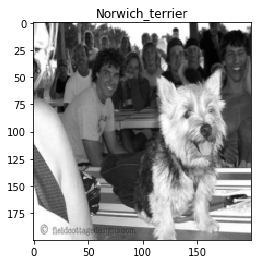

In [8]:
ex = dogs[0].reshape((200,200))
plt.imshow(ex, cmap='gray')
plt.title(labels[0])
plt.show()

In [9]:
# taken from Class Demo #4
def plot_gallery(images, titles, h, w, n_row=3, n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=1.5, top=.90, hspace=.35)
    
    # with slight modification
    sample = np.random.randint(low=0, high=images.shape[0], size=n_row*n_col)
    
    for i, idx in enumerate(sample):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[idx].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[idx], size=12)
        plt.xticks(())
        plt.yticks(())

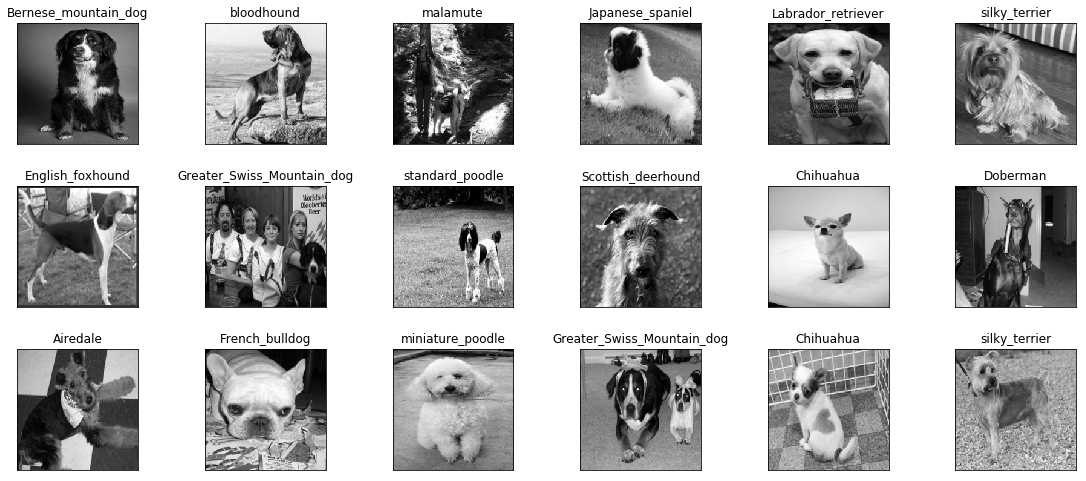

In [10]:
plot_gallery(dogs, labels, 200, 200) # defaults to showing a 3 by 6 subset of the faces

Aren't they cute?  The answer is yes. They are.

## Feature Extraction
### Gradient

Let's start by doing a simple edge detection using the gradient (a.k.a a sobel filter)

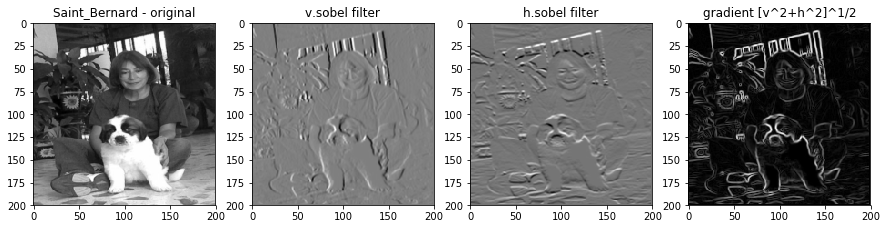

In [11]:
from skimage.filters import sobel_h, sobel_v

idx_to_reconstruct = int(np.random.rand(1)*len(dogs))
img  = dogs[idx_to_reconstruct].reshape((h,w))

plt.figure(figsize=(15,30))
plt.subplot(1,4,1)
plt.imshow(img, cmap='gray')
plt.title(labels[idx_to_reconstruct]+' - original')

plt.subplot(1,4,2)
plt.imshow(sobel_v(img,), cmap='gray')
plt.title('v.sobel filter')

plt.subplot(1,4,3)
plt.imshow(sobel_h(img), cmap='gray')
plt.title('h.sobel filter')

plt.subplot(1,4,4)
gradient_mag = np.sqrt(sobel_v(img)**2 + sobel_h(img)**2 ) 
plt.imshow(gradient_mag, cmap='gray')
plt.title('gradient [v^2+h^2]^1/2')
plt.show()

Let's take the gradient of each image in the dataset and see if we can use it to classify the breed.  Or at least get similar looking images...

In [12]:
def take_gradient(row, shape):
    img = row.reshape(shape)
    gradient_mag = np.sqrt(sobel_v(img)**2 + sobel_h(img)**2 ) 
    return gradient_mag.reshape(-1)
# case
%time take_gradient(dogs[0], ((h,w))).shape

CPU times: user 2.22 ms, sys: 881 µs, total: 3.1 ms
Wall time: 1.93 ms


(40000,)

In [13]:
%time grad_features = np.apply_along_axis(take_gradient, 1, dogs, (h,w))
print(grad_features.shape)

CPU times: user 3.96 s, sys: 365 ms, total: 4.33 s
Wall time: 4.38 s
(3000, 40000)


Let's take a quick look at some of these

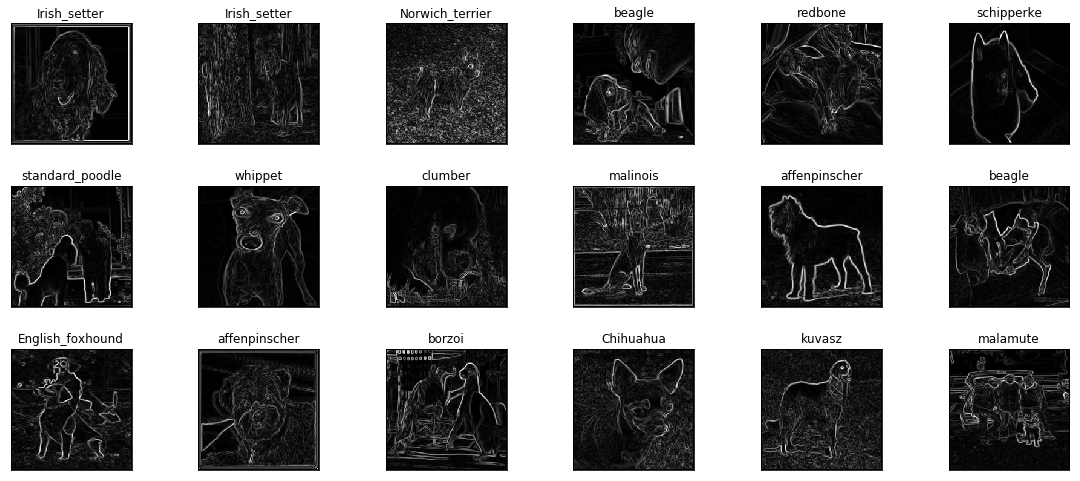

In [14]:
plot_gallery(grad_features, labels, h, w) 

It seems to be a pretty good edge detector, but because 1) there is a lot of noise in the images and 2) the dogs are in many different poses it probably isn't very good as a feature for classifying

In [15]:
from sklearn.metrics.pairwise import pairwise_distances
# find the pairwise distance between all the different image features
%time dist_matrix = pairwise_distances(grad_features)

CPU times: user 16.6 s, sys: 97.2 ms, total: 16.7 s
Wall time: 8.51 s


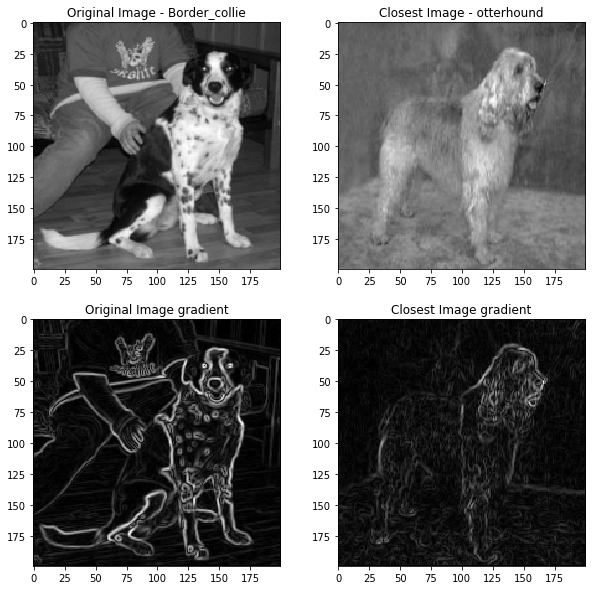

In [16]:
import copy
# find closest image to current image
idx1 = np.random.randint(0,len(dogs))
distances = copy.deepcopy(dist_matrix[idx1,:])
distances[idx1] = np.infty # dont pick the same image!
idx2 = np.argmin(distances)

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(dogs[idx1].reshape((h,w)), cmap='gray')
plt.title("Original Image - " + labels[idx1])

plt.subplot(2,2,2)
plt.imshow(dogs[idx2].reshape((h,w)), cmap='gray')
plt.title("Closest Image - " + labels[idx2])

plt.subplot(2,2,3)
plt.imshow(grad_features[idx1].reshape((h,w)), cmap='gray')
plt.title("Original Image gradient")

plt.subplot(2,2,4)
plt.imshow(grad_features[idx2].reshape((h,w)), cmap='gray')
plt.title("Closest Image gradient")

plt.show()

This method doesn't work very well for this dataset since its extremely sensitive position of the object in the image.  If two images are very "close" to one another using this method it is more likely that subject of the image are in similar positions, rather than the subjects being similar to one another.  For example consider the match from one iteration below:

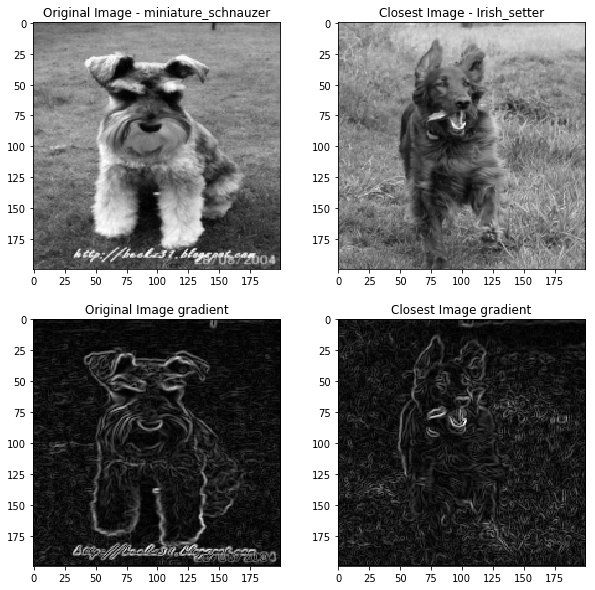

No one would ever mistake a miniature schnauzer for an Irish setter.  However, in these particular images the two dogs are both forward facing, approximately the same size relative to the size of the image, and pictured with a grassy background.  Thus, by their gradients, the images are similar.

This method is essentially the same as a pixel wise comparisson.  If an edge (i.e. high gradient intensity) occurs in one pixel in image A and appears just one pixel over in image B, the distance (as computed by 

We can illustrate this by looking at a heatmap of the pairwise distance of the gradients:

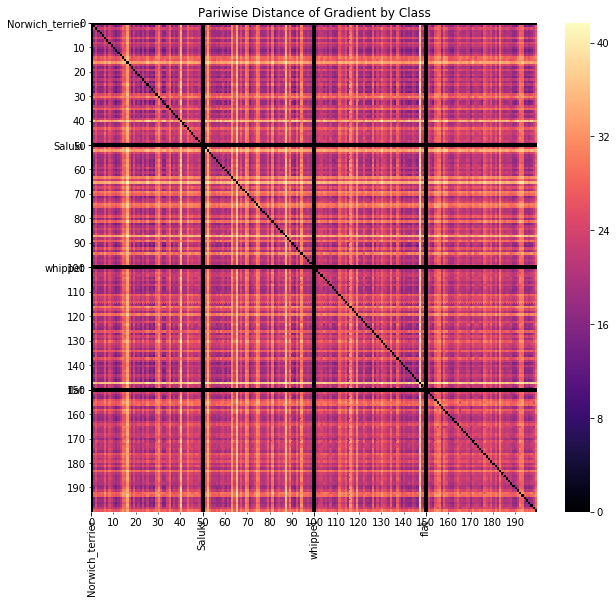

In [17]:
import seaborn as sns

plt.figure(figsize=(10,9))
ax = sns.heatmap(dist_matrix[:200,:200], cmap='magma')

ax.set_xticks(np.arange(0,200,50))
ax.set_xticks(np.arange(0,200,10), minor=True)
ax.set_yticks(np.arange(0,200,50))
ax.set_yticks(np.arange(0,200,10), minor=True)

ax.set_xticklabels([*labels[0:200:50]])
ax.set_xticklabels(np.arange(0,200,10), minor=True)
ax.set_yticklabels([*labels[0:200:50]])
ax.set_yticklabels(np.arange(0,200,10), minor=True)

ax.grid(markevery=5, lw=4,color='black')

ax.set_title('Pariwise Distance of Gradient by Class')

plt.show()


This heatmap shows the pairwise distance between the instances of the first four breeds in the dataset. If minimizing the distance in the gradient were any good as a classifier, one would expect there to be significantly darker colors within each major square along the diagnol vs. the rest of the grid.  Since each square in the 4x4 grid has roughly the same distribution of colors, we can conclude that this is not a good classifier.

What if we look at those gradients by class.

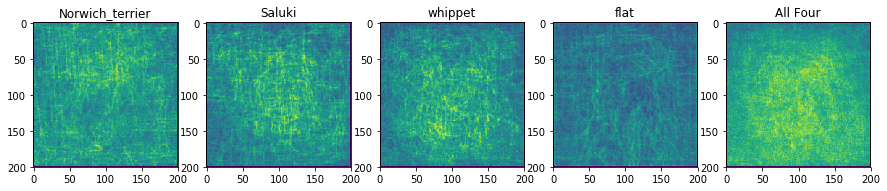

In [18]:
plt.figure(figsize=(15,25))

plt.subplot(1,5,1)
breedA = grad_features[0:50]
average_breedA = np.apply_along_axis(func1d=np.mean, arr=breedA, axis=0).reshape((h,w))
plt.imshow(average_breedA)
plt.title(labels[0])

plt.subplot(1,5,2)
breedB = grad_features[51:100]
average_breedB = np.apply_along_axis(func1d=np.mean, arr=breedB, axis=0).reshape((h,w))
plt.imshow(average_breedB)
plt.title(labels[51])

plt.subplot(1,5,3)
breedC = grad_features[101:150]
average_breedC = np.apply_along_axis(func1d=np.mean, arr=breedC, axis=0).reshape((h,w))
plt.imshow(average_breedC)
plt.title(labels[101])

plt.subplot(1,5,4)
breedD = grad_features[151:200]
average_breedD = np.apply_along_axis(func1d=np.mean, arr=breedD, axis=0).reshape((h,w))
plt.imshow(average_breedD)
plt.title(labels[151])

plt.subplot(1,5,5)
allFour = grad_features[:200]
average_allFour = np.apply_along_axis(func1d=np.median, arr=allFour, axis=0).reshape((h,w))
plt.imshow(average_allFour)
plt.title('All Four')


There clearly isn't much congruence among the images, which we knew already.  When we average the gradient over a class, it essentially looks like white noise, not much diffrent from when we take the average gradient over all four of them.

### Ordered Gradient

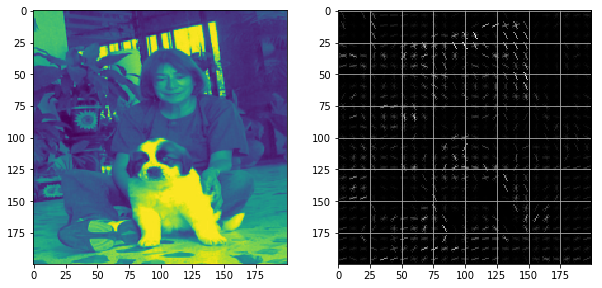

In [19]:
from skimage.feature import hog
# lets first visualize what the daisy descripto looks like
features, img_desc = hog(image=img, block_norm='L2-Hys',visualise=True)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(img_desc, cmap='gray')
plt.grid()

In [20]:
def apply_hog(row,shape):
    feat = hog(row.reshape(shape), block_norm='L2-Hys')
    return feat.reshape((-1))

%time test_feature = apply_hog(dogs[3],(h,w))
test_feature.shape


CPU times: user 37.7 ms, sys: 2 ms, total: 39.7 ms
Wall time: 41 ms


(42849,)

In [21]:
# apply to entire data, row by row,
%time hog_features = np.apply_along_axis(apply_hog, 1, dogs, (h,w))
print(hog_features.shape)

CPU times: user 1min 40s, sys: 1.5 s, total: 1min 42s
Wall time: 1min 44s
(3000, 42849)


In [22]:
from sklearn.metrics.pairwise import pairwise_distances
# find the pairwise distance between all the different image features
%time dist_matrix = pairwise_distances(hog_features)

CPU times: user 20.7 s, sys: 767 ms, total: 21.5 s
Wall time: 11.4 s


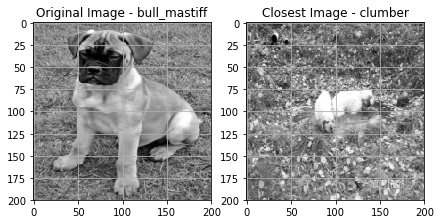

In [23]:
import copy
# find closest image to current image
idx1 = np.random.randint(len(dogs))
distances = copy.deepcopy(dist_matrix[idx1,:])
distances[idx1] = np.infty # dont pick the same image!
idx2 = np.argmin(distances)

plt.figure(figsize=(7,10))
plt.subplot(2,2,1)
plt.imshow(dogs[idx1].reshape((h,w)), cmap='gray')
plt.title("Original Image - "+labels[idx1])
plt.grid()

plt.subplot(2,2,2)
plt.imshow(dogs[idx2].reshape((h,w)), cmap='gray')
plt.title("Closest Image - "+labels[idx2])
plt.grid()



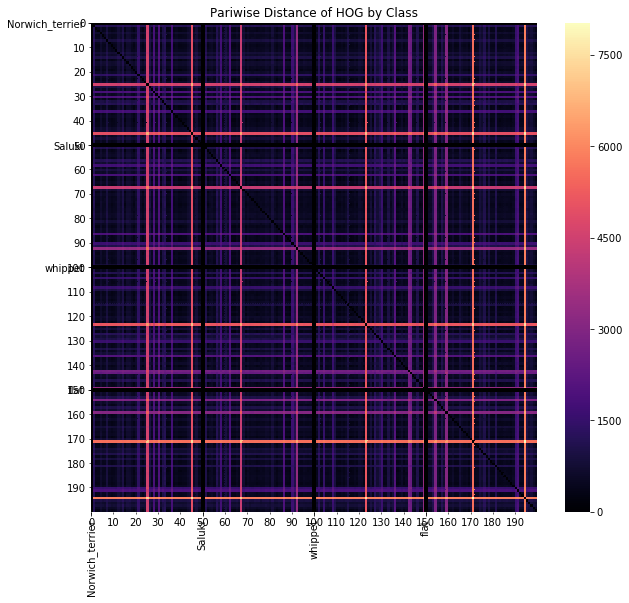

In [24]:
plt.figure(figsize=(10,9))
ax = sns.heatmap(dist_matrix[:200,:200], cmap='magma')

ax.set_xticks(np.arange(0,200,50))
ax.set_xticks(np.arange(0,200,10), minor=True)
ax.set_yticks(np.arange(0,200,50))
ax.set_yticks(np.arange(0,200,10), minor=True)

ax.set_xticklabels([*labels[0:200:50]])
ax.set_xticklabels(np.arange(0,200,10), minor=True)
ax.set_yticklabels([*labels[0:200:50]])
ax.set_yticklabels(np.arange(0,200,10), minor=True)

ax.grid(markevery=5, lw=4,color='black')

ax.set_title('Pariwise Distance of HOG by Class')

plt.show()

### DAISY

Let's see if using the DAISY method is any more effective as a classifier.

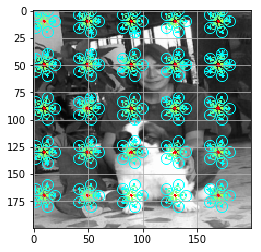

In [25]:
from skimage.feature import daisy
# lets first visualize what the daisy descripto looks like
features, img_desc = daisy(img,step=40, radius=10, rings=3, histograms=5, orientations=8, visualize=True)
plt.imshow(img_desc, cmap='gray')
plt.grid()

In [26]:
# create a function to tak in the row of the matric and return a new feature
def apply_daisy(row,shape):
    feat = daisy(row.reshape(shape),step=10, radius=10, rings=2, histograms=6, orientations=8, visualize=False)
    return feat.reshape((-1))

%time test_feature = apply_daisy(dogs[3],(h,w))
test_feature.shape


CPU times: user 59.3 ms, sys: 15.3 ms, total: 74.6 ms
Wall time: 76.2 ms


(33696,)

In [27]:
# apply to entire data, row by row,
# takes about a minute to run
%time daisy_features = np.apply_along_axis(apply_daisy, 1, dogs, (h,w))
print(daisy_features.shape)

CPU times: user 2min 44s, sys: 24.7 s, total: 3min 8s
Wall time: 3min 12s
(3000, 33696)


In [28]:
from sklearn.metrics.pairwise import pairwise_distances
# find the pairwise distance between all the different image features
%time dist_matrix = pairwise_distances(daisy_features)

CPU times: user 16.7 s, sys: 590 ms, total: 17.3 s
Wall time: 9.48 s


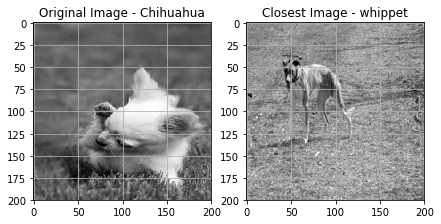

In [29]:
import copy
# find closest image to current image
idx1 = np.random.randint(len(dogs))
distances = copy.deepcopy(dist_matrix[idx1,:])
distances[idx1] = np.infty # dont pick the same image!
idx2 = np.argmin(distances)

plt.figure(figsize=(7,10))
plt.subplot(1,2,1)
plt.imshow(dogs[idx1].reshape((h,w)), cmap='gray')
plt.title("Original Image - "+labels[idx1])
plt.grid()

plt.subplot(1,2,2)
plt.imshow(dogs[idx2].reshape((h,w)), cmap='gray')
plt.title("Closest Image - "+labels[idx2])
plt.grid()

Hey!  It actually got one right!

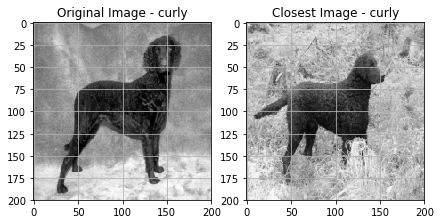

However these two images are of the curly in ** *VERY* ** similar poses

Now this is interesting

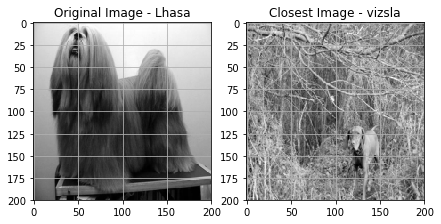

It looks like the outline of the branches is most similar to this very long haired dog.


On inspection it looks like this does at least a little better than the gradient method, but it still seems to be working on the context of the image more than the content in it, i.e. the potition and orientation of the dog rather than the characteristics of the dog itself

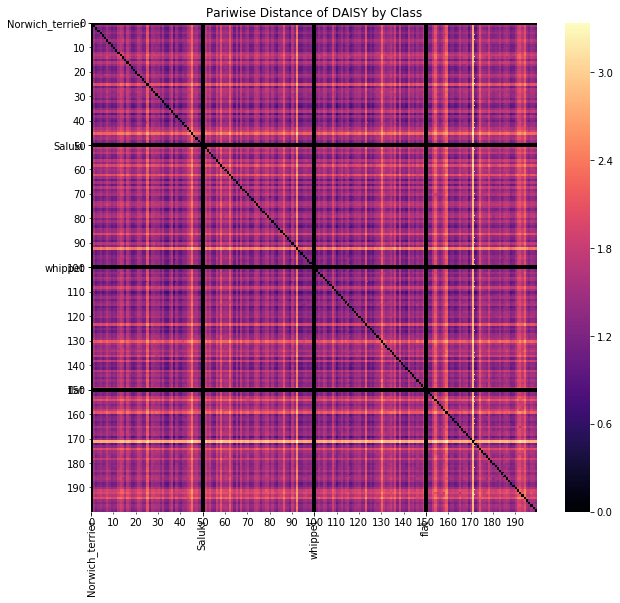

In [30]:

plt.figure(figsize=(10,9))
ax = sns.heatmap(dist_matrix[:200,:200], cmap='magma')

ax.set_xticks(np.arange(0,200,50))
ax.set_xticks(np.arange(0,200,10), minor=True)
ax.set_yticks(np.arange(0,200,50))
ax.set_yticks(np.arange(0,200,10), minor=True)

ax.set_xticklabels([*labels[0:200:50]])
ax.set_xticklabels(np.arange(0,200,10), minor=True)
ax.set_yticklabels([*labels[0:200:50]])
ax.set_yticklabels(np.arange(0,200,10), minor=True)

ax.grid(markevery=5, lw=4,color='black')

ax.set_title('Pariwise Distance of DAISY by Class')

plt.show()

When we look at the same heatmap as before we see that overall the distances are reduced (there seems to also be a factor of 10 in the daisy computation) but again there is no reall difference between classes.